# Homework 1, Problem 3
author: k.wodehouse

I'll start off by bringing in all the data as a dataframe for ease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'T (C)': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Volume of 1 gram of H2O (cm3)': [1.0001329, 1.0000733, 1.0000321, 1.0000078, 1.0000000, 1.0000081, 1.0000318, 1.0000704, 1.0001236, 1.0001909, 1.0002719, 1.0015678, 1.0043408, 1.0078108, 1.012074, 1.017046, 1.022694, 1.028987, 1.035904, 1.043427],
    'Volume of 1 gram of Hg (cm3)': [0.0735560, 0.0735694, 0.0735828, 0.0735961, 0.0736095, 0.0736228, 0.0736362, 0.0736496, 0.0736629, 0.0736763, 0.0736893, 0.0738233, 0.0739572, 0.0740910, 0.0742250, 0.0743592, 0.0744936, 0.0746282, 0.0747631, 0.0748981]
}

df = pd.DataFrame(data).set_index('T (C)')

Graphing the specific volume of $H_2O$ as a function of temperature

Text(0.5, 1.0, 'Specific Volume of $H_2O$ ($cm^3 / g$) vs. Temperature (◦C)')

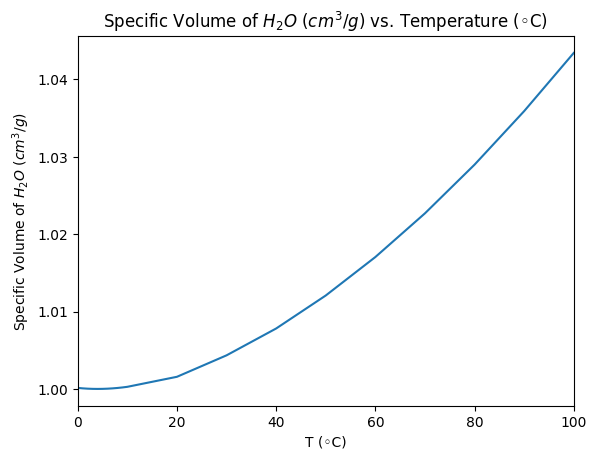

In [14]:
plt.plot(df['Volume of 1 gram of H2O (cm3)'], label='H2O')
plt.xlim(0, 100)
plt.xlabel('T (◦C)')
plt.ylabel('Specific Volume of $H_2O$ $(cm^3/g)$')
plt.title('Specific Volume of $H_2O$ ($cm^3 / g$) vs. Temperature (◦C)')

doing the same for mercury

Text(0.5, 1.0, 'Specific Volume of $Hg$ ($cm^3 / g$) vs. Temperature (◦C)')

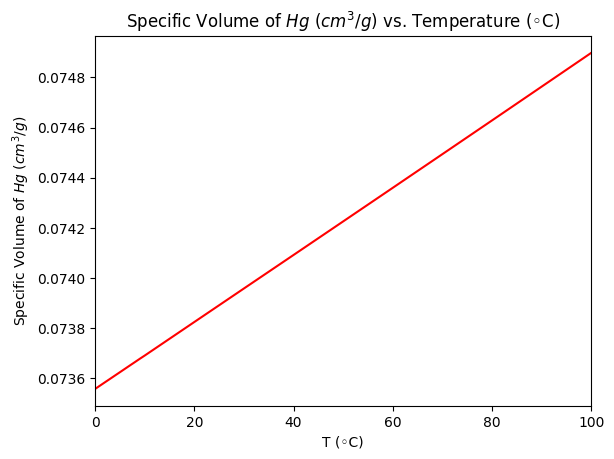

In [15]:
plt.plot(df['Volume of 1 gram of Hg (cm3)'], label='Hg', color='red')
plt.xlim(0, 100)
plt.xlabel('T (◦C)')
plt.ylabel('Specific Volume of $Hg$ $(cm^3/g)$')
plt.title('Specific Volume of $Hg$ ($cm^3 / g$) vs. Temperature (◦C)')

# a
visualizing the specific volume of water from T=$0^oC$ to T=$10^oC$

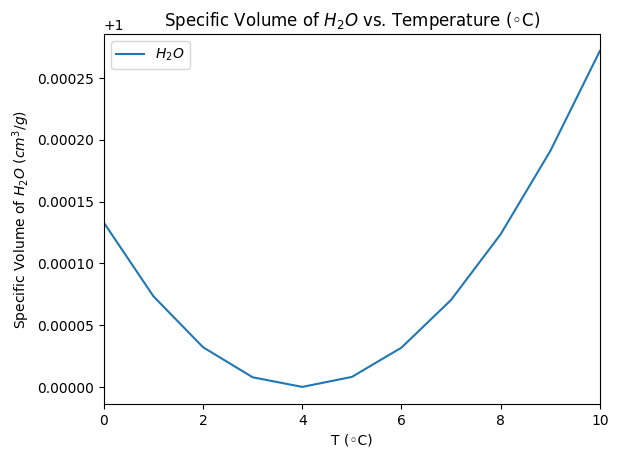

In [16]:
plt.plot(df['Volume of 1 gram of H2O (cm3)'][:11], label='$H_2O$')
plt.xlim(0, 10)
plt.xlabel('T (◦C)')
plt.ylabel('Specific Volume of $H_2O$ $(cm^3/g)$')
plt.title('Specific Volume of $H_2O$ vs. Temperature (◦C)')
plt.legend()

water wouldnt be very good on this range of temperatures since its hard to tell 0-2 apart from 6-8 and also water as a whole (from the earlier visualization) is quite nonlinear. since it's not strictly increasing/decreasing the temperature could be rising but the thermometer level could be changing directions. this is not what you want a thermometer to do!

# b
first simulate one that's only calibrated at $0^oC$ and $100^oC$

equation: y = 1.342e-05x + 0.073556


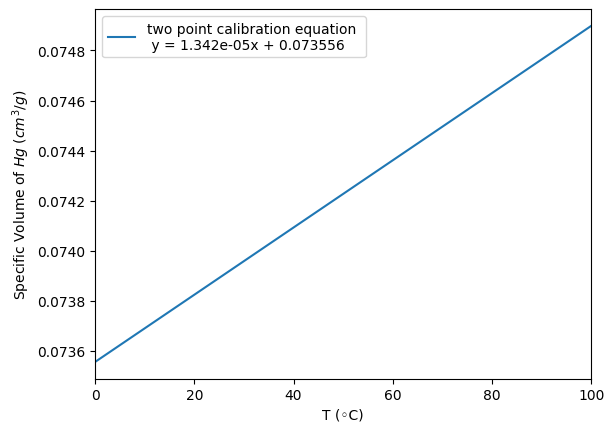

In [17]:
volumes = [df['Volume of 1 gram of Hg (cm3)'][0], df['Volume of 1 gram of Hg (cm3)'][100]]
temperatures = [0, 100]

m, b = np.polyfit(temperatures, volumes, 1)
print(f'equation: y = {m:.3e}x + {b:.6f}')

plt.plot(temperatures, m*np.array(temperatures) + b, label=f'two point calibration equation \n y = {m:.3e}x + {b:.6f}')
plt.xlim(0, 100)
plt.xlabel('T (◦C)')
plt.ylabel('Specific Volume of $Hg$ $(cm^3/g)$')
plt.legend()

The two point calibration gives us
$$
    \hat{V} = 1.342 \cdot 10^{-5} \cdot T + 0.073556
$$

Which means

$$
    T_{meas} = \frac{\hat{V} - 0.073556}{1.3402 \cdot 10^{-5}}
$$

so we go through each $\bar{V}$ in the table and calculate what temp that correlates to on the two point calibration, subtract the actual temperature from it, and then put together a nice little graph

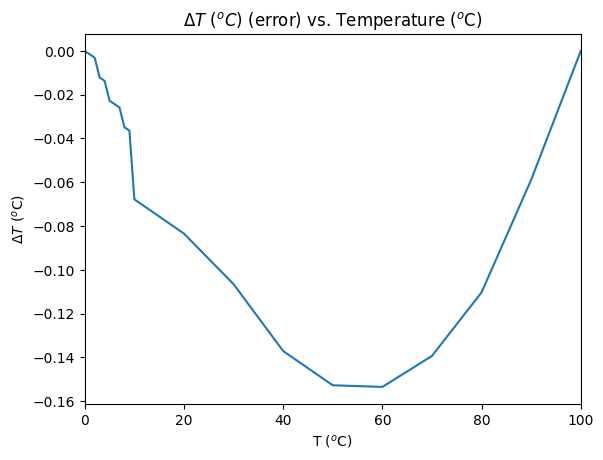

In [18]:
volumes = df['Volume of 1 gram of Hg (cm3)']
temperatures = df.index
measured_temps = (volumes - b) / m
delta_T = measured_temps - temperatures

plt.plot(temperatures, delta_T, label='Measured Temperatures')
plt.xlim(0, 100)
plt.xlabel('T ($^o$C)')
plt.ylabel('$\Delta T$ ($^o$C)')
plt.title('$\Delta T \ (^oC)$ (error) vs. Temperature ($^o$C)');

# c
The change in height of the mercury is proportional to how much the volume increases and inversely proportional to the cross sectional area of the tube/capilarry. To put this in math:

$$
    \Delta h_{mercury} = \frac{\Delta V}{A}
$$

So if you want to maximize the thermometers response to changes in temperatures you'd minimize the $A$, which is the purpose of using the capilarry tube, and maximize the $\Delta V$, which is the purpose of the large bulb since having more mass of $Hg$ increases the $\Delta V$